#**install and imports**

In [ ]:
!pip install pyts

In [ ]:
from pyts.image import GramianAngularField

In [ ]:
import pandas as pd
import numpy as np
import ast

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, MaxPooling1D , Conv1D , Dropout , Activation , Embedding , Input , Lambda , Conv2D , MaxPooling2D , Flatten
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import keras
from keras.regularizers import l2
from keras.layers import BatchNormalization

In [ ]:
from keras.models import load_model

In [ ]:
import math 

#**load data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/programming/full_data.csv')

In [ ]:
# opens = [float(ast.literal_eval(mid)['o']) for mid in df['mid']]
# highs = [float(ast.literal_eval(mid)['h']) for mid in df['mid']]
# lows = [float(ast.literal_eval(mid)['l']) for mid in df['mid']]
# closes = [float(ast.literal_eval(mid)['c']) for mid in df['mid']]

# df['Open'] = opens
# df['High'] = highs
# df['Low'] = lows
# df['Close'] = closes
# df['Volume'] = df['volume'].astype('float64')
# df = df.fillna(0)

In [ ]:
# opens = [float(ast.literal_eval(mid)['o']) for mid in df['mid']]
# highs = [float(ast.literal_eval(mid)['h']) for mid in df['mid']]
# lows = [float(ast.literal_eval(mid)['l']) for mid in df['mid']]
# closes = [float(ast.literal_eval(mid)['c']) for mid in df['mid']]

# df['Open'] = opens
# df['High'] = highs
# df['Low'] = lows
# df['Close'] = closes
# df['Volume'] = df['volume'].astype('float64')
# df = df.fillna(0)

In [ ]:
df = df[['Open' , 'High' , 'Low' , 'Close' , 'Volume' , 'Action']]

In [ ]:
df.tail()

,Open,High,Low,Close,Volume,Action
105088,1778.570,1778.570,1778.090,1778.505,57.0,0
105089,1778.445,1778.445,1777.975,1778.186,37.0,0
105090,1778.145,1778.240,1777.980,1778.215,19.0,0
105091,1778.255,1778.775,1778.255,1778.705,31.0,0
105092,1778.656,1778.785,1778.505,1778.550,38.0,0


#**data prepration**

In [ ]:
x_length = 72
y_length = 72

In [ ]:
X_batches = df[['Open' , 'High' , 'Low' , 'Close' , 'Volume']].rolling(x_length).mean().pct_change().fillna(0)[x_length:]
y_batches = df['Action'][x_length:]

In [ ]:
X_batches = X_batches.values
y_batches = y_batches.values

In [ ]:
y_batches

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# y_batches = np.where(y_batches==1, 2, y_batches)
# y_batches = np.where(y_batches==0, 1, y_batches)
# y_batches = np.where(y_batches==-1, 0, y_batches)

In [ ]:
min_item = len(y_batches[y_batches == 1])
min_item

34272

In [ ]:
indexes = np.where(y_batches == 0)[0][min_item:]
y_batches = np.delete(y_batches , indexes)
X_batches = np.delete(X_batches , indexes , axis=0)

indexes = np.where(y_batches == 1)[0][min_item:]
y_batches = np.delete(y_batches , indexes)
X_batches = np.delete(X_batches , indexes , axis=0)

# indexes = np.where(y_batches == 2)[0][min_item:]
# y_batches = np.delete(y_batches , indexes)
# X_batches = np.delete(X_batches , indexes , axis=0)

In [ ]:
len(y_batches[y_batches == 0]) , len(y_batches[y_batches == 1]) 

(34272, 34272)

In [ ]:
# X = df.loc[:, df.columns != 'Action']
X = X_batches
y = y_batches

print(X.shape , y.shape)

(68544, 5) (68544,)


In [ ]:
prices = []
for i in range(len(X) - x_length):
  data = X[i:i+x_length]
  data = data.reshape(1,-1)

  # gasf = GramianAngularField(image_size=24, method='summation')
  # data = gasf.fit_transform(data)

  gadf = GramianAngularField(image_size=32, method='difference')
  data = gadf.fit_transform(data)

  data = data[0]

  prices.append(data)

In [ ]:
X = np.array(prices)

if len(prices) != len(y):
  y = y[x_length:]

In [ ]:
X.shape

(68472, 32, 32)

#**splitting data**

In [ ]:
X_train , X_validation , y_train , y_validation = train_test_split(X,y,test_size = 0.2 , shuffle=True)

In [ ]:
y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)

In [ ]:
X_validation.shape , y_validation.shape

((13695, 32, 32), (13695, 2))

#**visualizing data**

In [ ]:
from PIL import Image as im

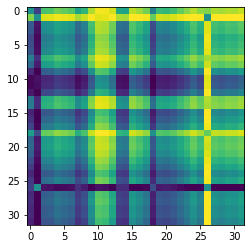

1


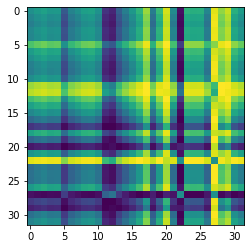

1


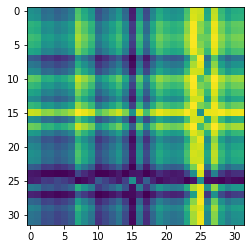

1


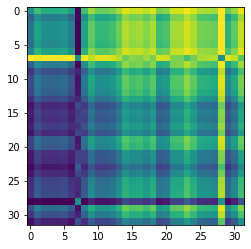

1


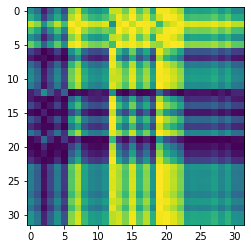

1


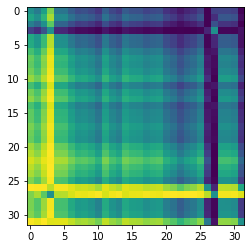

1


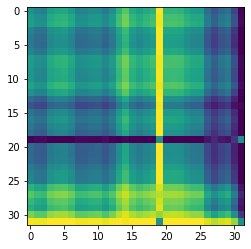

1


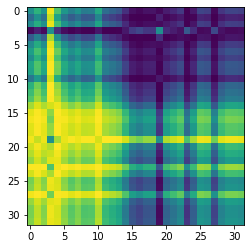

1


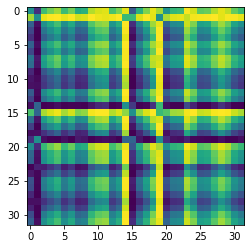

1


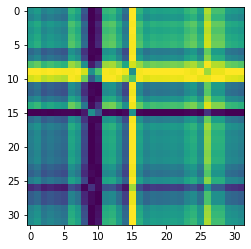

1


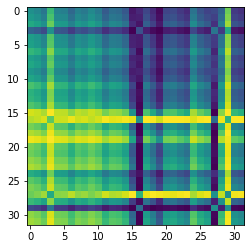

1


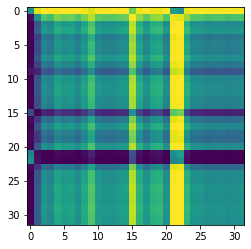

1


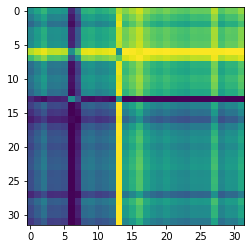

1


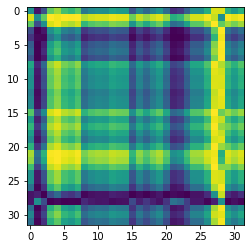

1


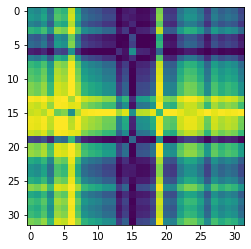

1


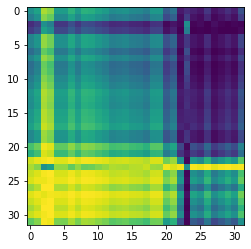

1


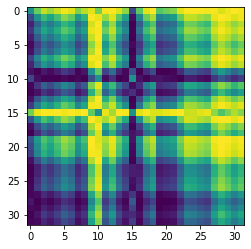

1


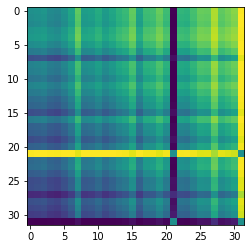

1


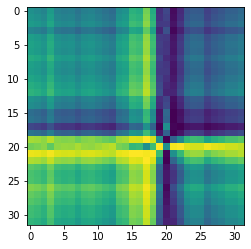

1


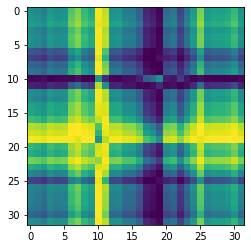

1


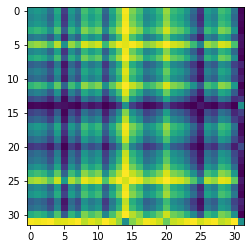

1


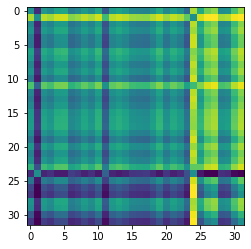

1


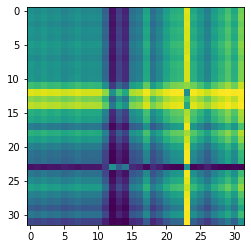

1


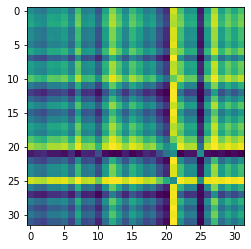

1


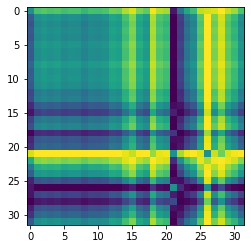

1


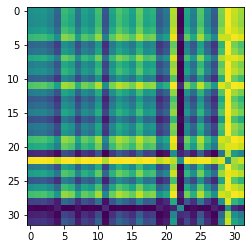

1


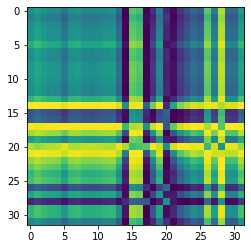

1


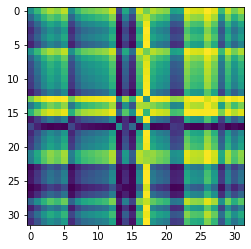

1


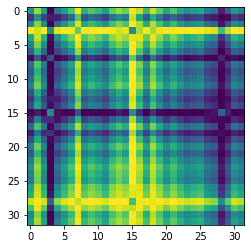

1


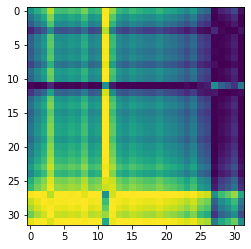

1


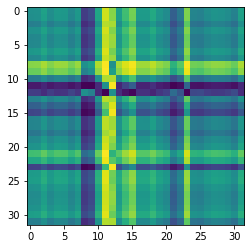

1


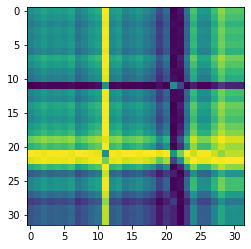

1


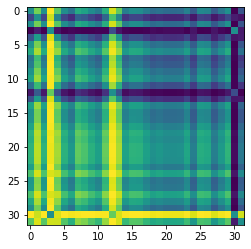

1


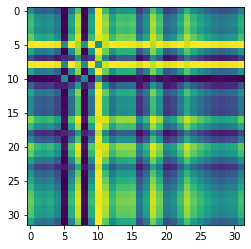

1


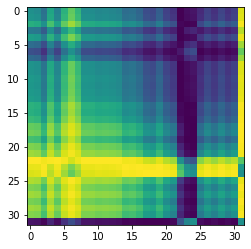

0


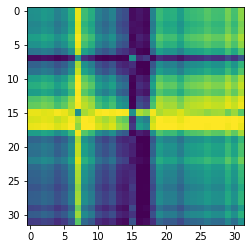

0


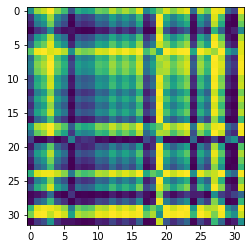

0


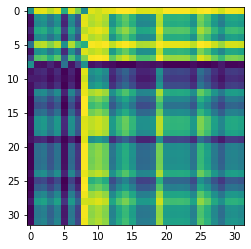

0


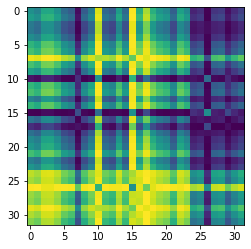

0


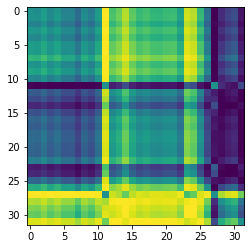

0


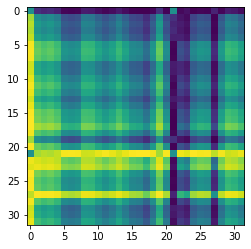

0


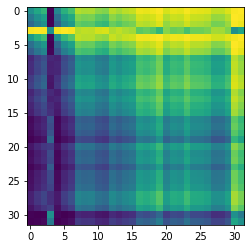

0


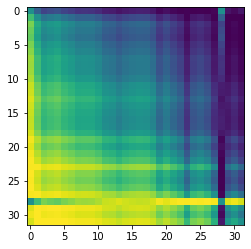

0


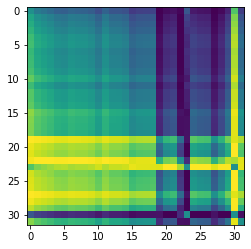

0


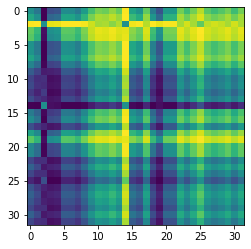

0


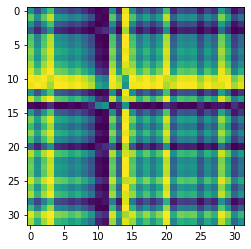

0


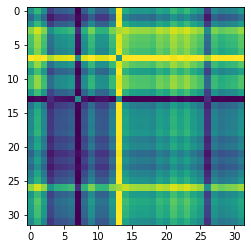

0


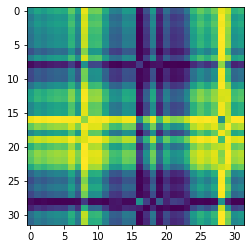

0


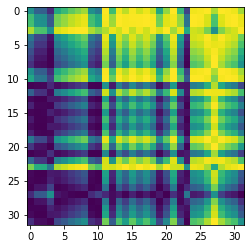

0


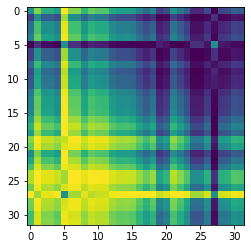

0


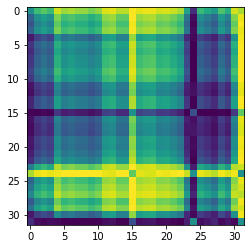

0


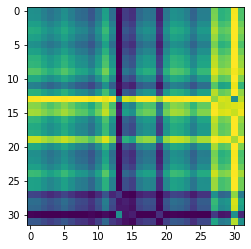

0


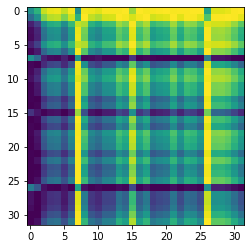

0


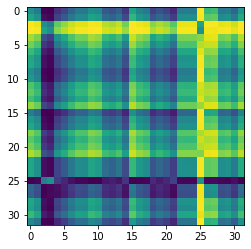

0


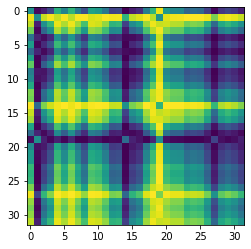

0


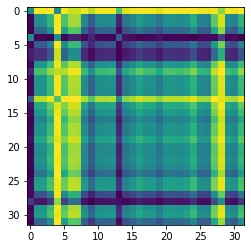

0


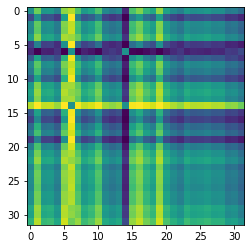

0


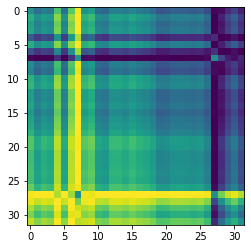

0


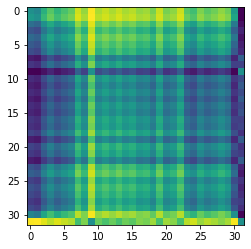

0


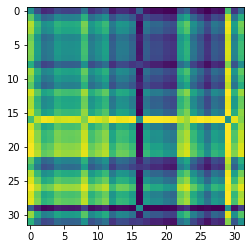

0


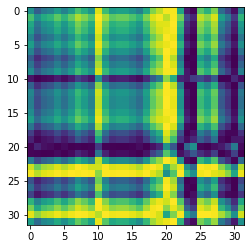

0


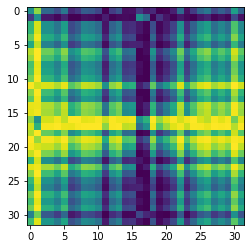

0


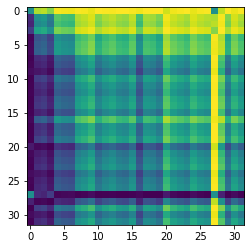

0


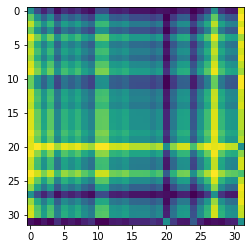

0


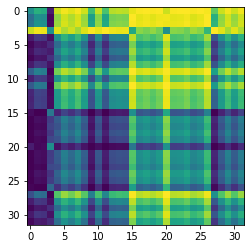

0


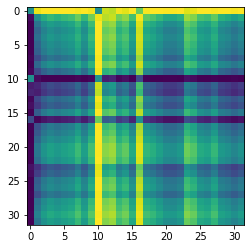

0


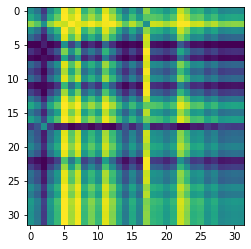

0


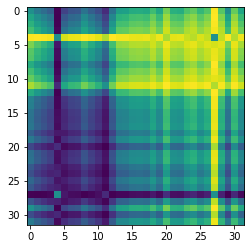

0


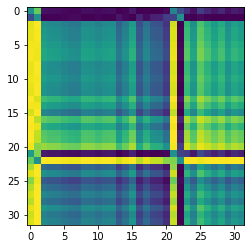

0


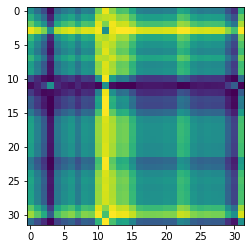

0


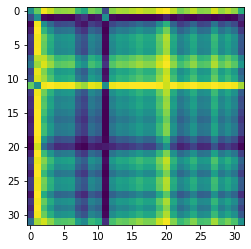

0


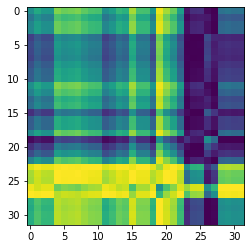

0


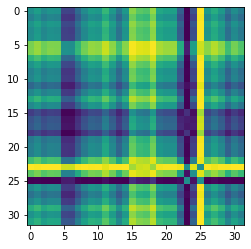

0


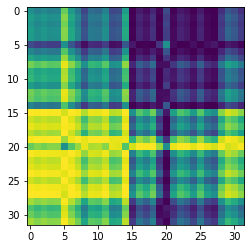

0


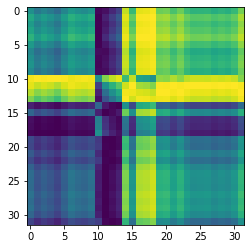

0


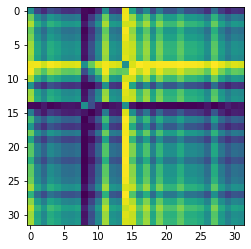

1


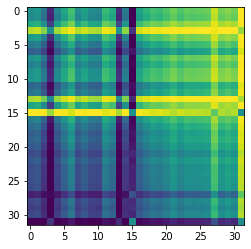

1


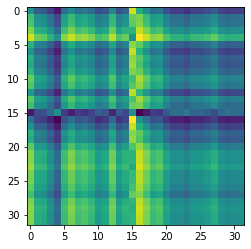

1


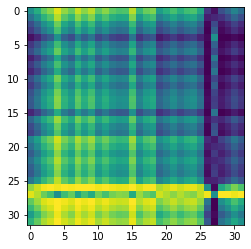

1


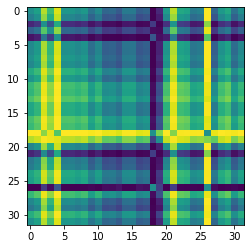

1


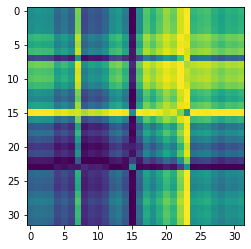

1


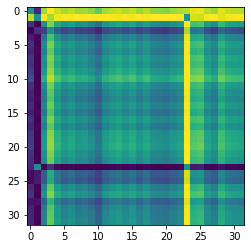

1


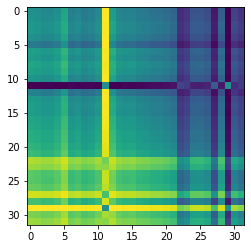

1


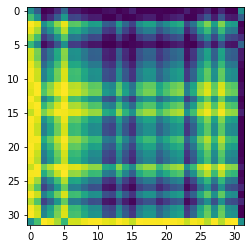

1


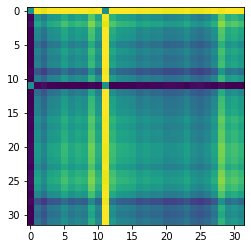

1


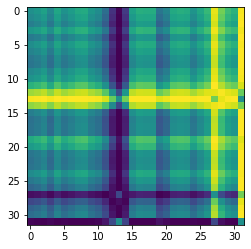

1


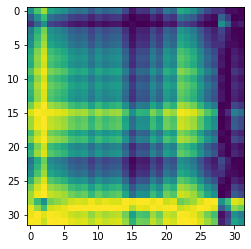

1


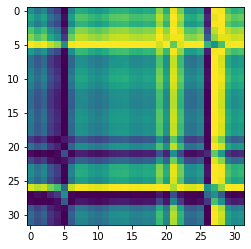

1


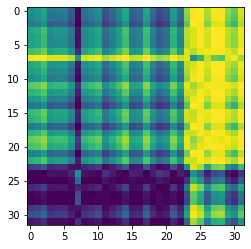

1


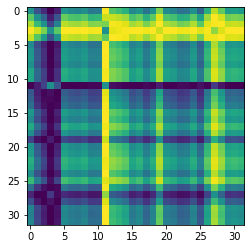

1


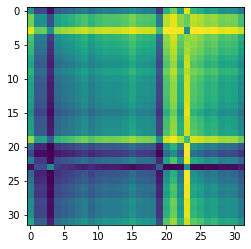

1


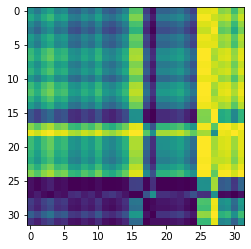

1


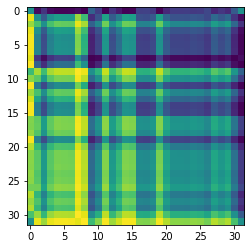

0


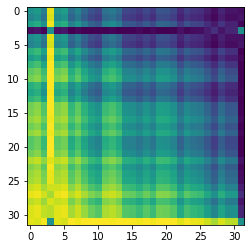

1


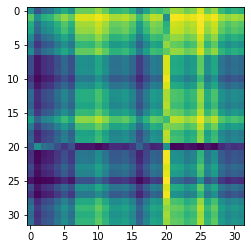

1


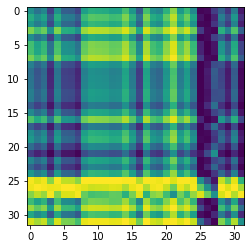

1


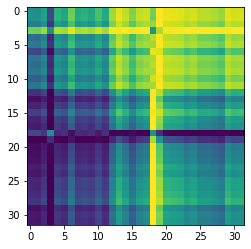

1


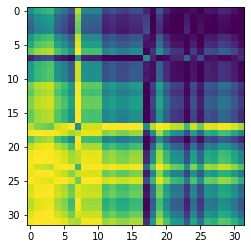

1


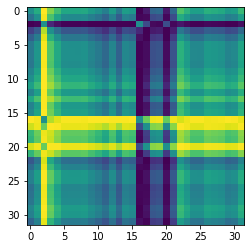

1


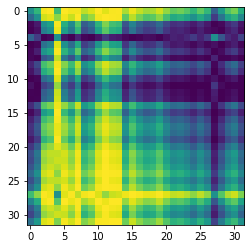

1


In [ ]:
for i in range(100):
  d = X_train[i]
  plt.imshow(d , interpolation='nearest')
  plt.show()
  print(y[i])

#**training model**

In [ ]:
X_train = X_train.reshape(X_train.shape[0] , 32 , 32 , 1)
X_validation = X_validation.reshape(X_validation.shape[0] , 32 , 32 , 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(32,32,1) , trainable=True))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding="same", activation="relu" , trainable=True))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding="same", activation="relu" , trainable=True))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128,activation="relu" , trainable=True))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)         

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = keras.losses.CategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=250, batch_size=256, validation_data=(X_validation, y_validation), verbose=1)

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4835: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


214/214 [==============================] - 3s 11ms/step - loss: 0.6937 - accuracy: 0.5220 - val_loss: 0.6747 - val_accuracy: 0.5838
Epoch 2/250
214/214 [==============================] - 2s 9ms/step - loss: 0.6727 - accuracy: 0.5852 - val_loss: 0.6582 - val_accuracy: 0.5992
Epoch 3/250
214/214 [==============================] - 2s 9ms/step - loss: 0.6575 - accuracy: 0.6098 - val_loss: 0.6487 - val_accuracy: 0.6165
Epoch 4/250
214/214 [==============================] - 2s 9ms/step - loss: 0.6528 - accuracy: 0.6099 - val_loss: 0.6436 - val_accuracy: 0.6145
Epoch 5/250
214/214 [==============================] - 2s 9ms/step - loss: 0.6461 - accuracy: 0.6196 - val_loss: 0.6401 - val_accuracy: 0.6242
Epoch 6/250
214/214 [==============================] - 2s 9ms/step - loss: 0.6421 - accuracy: 0.6219 - val_loss: 0.6424 - val_accuracy: 0.6284
Epoch 7/250
214/214 [==============================] - 2s 8ms/step - loss: 0.6389 - accuracy: 0.6292 - val_loss: 0.6368 - val_accuracy: 0.6203
Epoch 8/25

In [ ]:
scores = model.evaluate(X_validation, y_validation, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 71.73%


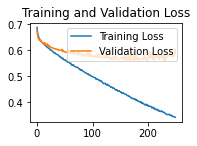

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(250)

# plt.figure(figsize=(15, 15))
# plt.subplot(2, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('FOREX_CNN.h5', overwrite=True)

#**Predict with model**

In [ ]:
model = load_model('FOREX_CNN.h5')

In [ ]:
X_validation.shape

(6546, 32, 32, 1)

In [ ]:
prediction = model.predict_classes(X_validation.reshape(X_validation.shape[0] , 32 ,32 ,1))
print(prediction[:10] , raw_y_validation[:10])

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0 1 1 1 0 1 1 0 0 1] [0 1 1 0 0 1 0 0 1 1]
